
Top 10 similar books to 'The Hobbit':
1. The Lord of the Rings
2. Harry Potter and the Sorcerer’s Stone
3. 1984
4. Brave New World
5. Fahrenheit 451
6. Pride and Prejudice
7. Sense and Sensibility
8. Wuthering Heights
9. Jane Eyre

Top 10 similar books to '1984':
1. Wuthering Heights
2. Jane Eyre
3. Pride and Prejudice
4. The Hobbit
5. The Lord of the Rings
6. Harry Potter and the Sorcerer’s Stone
7. Brave New World
8. Fahrenheit 451
9. Sense and Sensibility

Top 10 similar books to 'Pride and Prejudice':
1. Brave New World
2. 1984
3. Wuthering Heights
4. Jane Eyre
5. The Hobbit
6. The Lord of the Rings
7. Harry Potter and the Sorcerer’s Stone
8. Fahrenheit 451
9. Sense and Sensibility


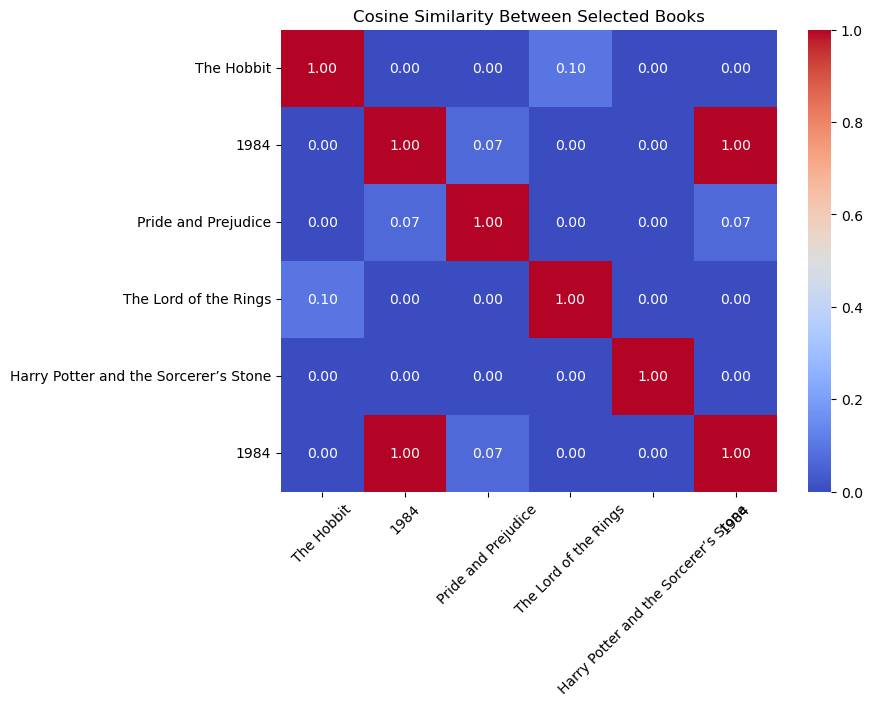

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
file_path = "downloads/sample_books_dataset.csv"
df = pd.read_csv(file_path)

# Data Cleaning: Fill missing values
df['Book Description'].fillna('', inplace=True)
df['Genre'].fillna('Unknown', inplace=True)
df['Average Rating'].fillna(df['Average Rating'].median(), inplace=True)

# Feature Extraction 
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['Book Description'])

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get the top 10 similar books
def get_top_similar_books(query_book_title, df, similarity_matrix):
    try:
        idx = df[df['Title'].str.lower() == query_book_title.lower()].index[0]
    except IndexError:
        print(f"Book '{query_book_title}' not found in dataset.")
        return []
    
    sim_scores = list(enumerate(similarity_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]
    top_books = [df.iloc[i[0]]['Title'] for i in sim_scores]
    
    return top_books

# Query books
query_books = ["The Hobbit", "1984", "Pride and Prejudice"]

# Generate similarity results
results = {book: get_top_similar_books(book, df, cosine_sim) for book in query_books}

# Print results
for query, similar_books in results.items():
    print(f"\nTop 10 similar books to '{query}':")
    for idx, book in enumerate(similar_books, 1):
        print(f"{idx}. {book}")

# Visualization: Heatmap of similarity scores for selected books
fig, ax = plt.subplots(figsize=(8, 6))
selected_books = query_books + results[query_books[0]][:3]  # Include query + top 3 similar
selected_indices = [df[df['Title'] == book].index[0] for book in selected_books if book in df['Title'].values]

sns.heatmap(cosine_sim[np.ix_(selected_indices, selected_indices)], 
            xticklabels=selected_books, 
            yticklabels=selected_books, 
            cmap="coolwarm", annot=True, fmt=".2f", ax=ax)

plt.title("Cosine Similarity Between Selected Books")
plt.xticks(rotation=45)
plt.show()